# MLP network in tf

In [64]:
import tensorflow

In [95]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [66]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

In [67]:
X_train.shape

(60000, 28, 28)

In [68]:
X_test.shape

(10000, 28, 28)

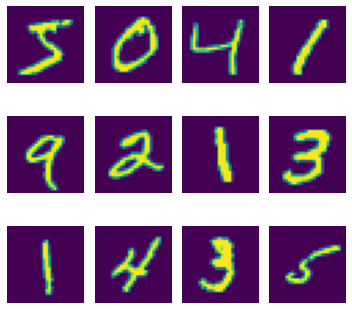

In [69]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3,4,k+1)
    plt.imshow(X_train[k])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [70]:
Y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

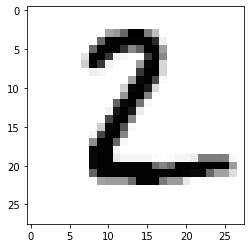

In [71]:
plt.imshow(X_test[1],cmap='Greys')

In [72]:
X_test[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 116, 125, 171,
        255, 255, 150,  93,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 169, 253, 253, 253,
        253, 253, 253, 218,  30,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 169, 253, 253, 253, 213,
        142, 176, 253, 253, 122,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

# preprocessing

In [73]:
X_train = X_train.reshape(60000, (28*28)).astype('float32')
X_test = X_test.reshape(10000, (28*28)).astype('float32')

In [74]:
X_train /=255
X_test /=255

In [75]:
X_train[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [76]:
n_classes = 10
Y_train = to_categorical(Y_train, n_classes)
Y_test = to_categorical(Y_test,n_classes)

In [77]:
Y_test[1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Model

In [113]:
model = Sequential()

model.add(Dense(64,activation='relu',input_shape=(784,)))
model.add(BatchNormalization())

model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())

model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

In [114]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 64)                50240     
_________________________________________________________________
batch_normalization_11 (Batc (None, 64)                256       
_________________________________________________________________
dense_32 (Dense)             (None, 64)                4160      
_________________________________________________________________
batch_normalization_12 (Batc (None, 64)                256       
_________________________________________________________________
dense_33 (Dense)             (None, 64)                4160      
_________________________________________________________________
batch_normalization_13 (Batc (None, 64)                256       
_________________________________________________________________
dropout (Dropout)            (None, 64)               

# compile

In [118]:
model.compile(loss ='categorical_crossentropy',optimizer= SGD(lr=0.1) ,metrics=['accuracy'])   #val_accuracy = 98.04

#model.compile(loss ='categorical_crossentropy',optimizer= 'nadam' ,metrics=['accuracy'])     #val_accuracy = 97.46

# Fit/Train

In [119]:
model.fit(x= X_train,y= Y_train,epochs=20, batch_size=128,verbose=1,validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 104us/sample - loss: 0.0152 - accuracy: 0.9949 - val_loss: 0.0858 - val_accuracy: 0.9794
Epoch 2/20
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0113 - accuracy: 0.9962 - val_loss: 0.0851 - val_accuracy: 0.9796
Epoch 3/20
60000/60000 [==============================] - 7s 125us/sample - loss: 0.0096 - accuracy: 0.9971 - val_loss: 0.0865 - val_accuracy: 0.9790
Epoch 4/20
60000/60000 [==============================] - 12s 202us/sample - loss: 0.0079 - accuracy: 0.9974 - val_loss: 0.0858 - val_accuracy: 0.9803
Epoch 5/20
60000/60000 [==============================] - 17s 276us/sample - loss: 0.0074 - accuracy: 0.9976 - val_loss: 0.0871 - val_accuracy: 0.9805
Epoch 6/20
60000/60000 [==============================] - 15s 252us/sample - loss: 0.0066 - accuracy: 0.9980 - val_loss: 0.0908 - val_accuracy: 0.9794
Epoch 7/20
60000/60000 [========================

# evaluate

In [120]:
model.evaluate(X_test, Y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.10008847180881154, 0.9804]

In [121]:
X_test_1 = X_test[1].reshape(1,784)

In [122]:
X_test_1.shape

(1, 784)

In [123]:
model.predict(X_test_1)

array([[1.5520907e-12, 1.6134791e-10, 1.0000000e+00, 3.8010364e-10,
        2.4897981e-10, 3.3350458e-11, 4.5301052e-09, 5.9866549e-11,
        1.2582624e-10, 6.6460624e-16]], dtype=float32)

In [124]:
model.predict_classes(X_test_1)

array([2])